In [1]:
from PIL import Image
from modules.facedet import FaceDet
from modules.count import Count
from modules.eval import Eval
from modules.result import Result

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11070). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025845868/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


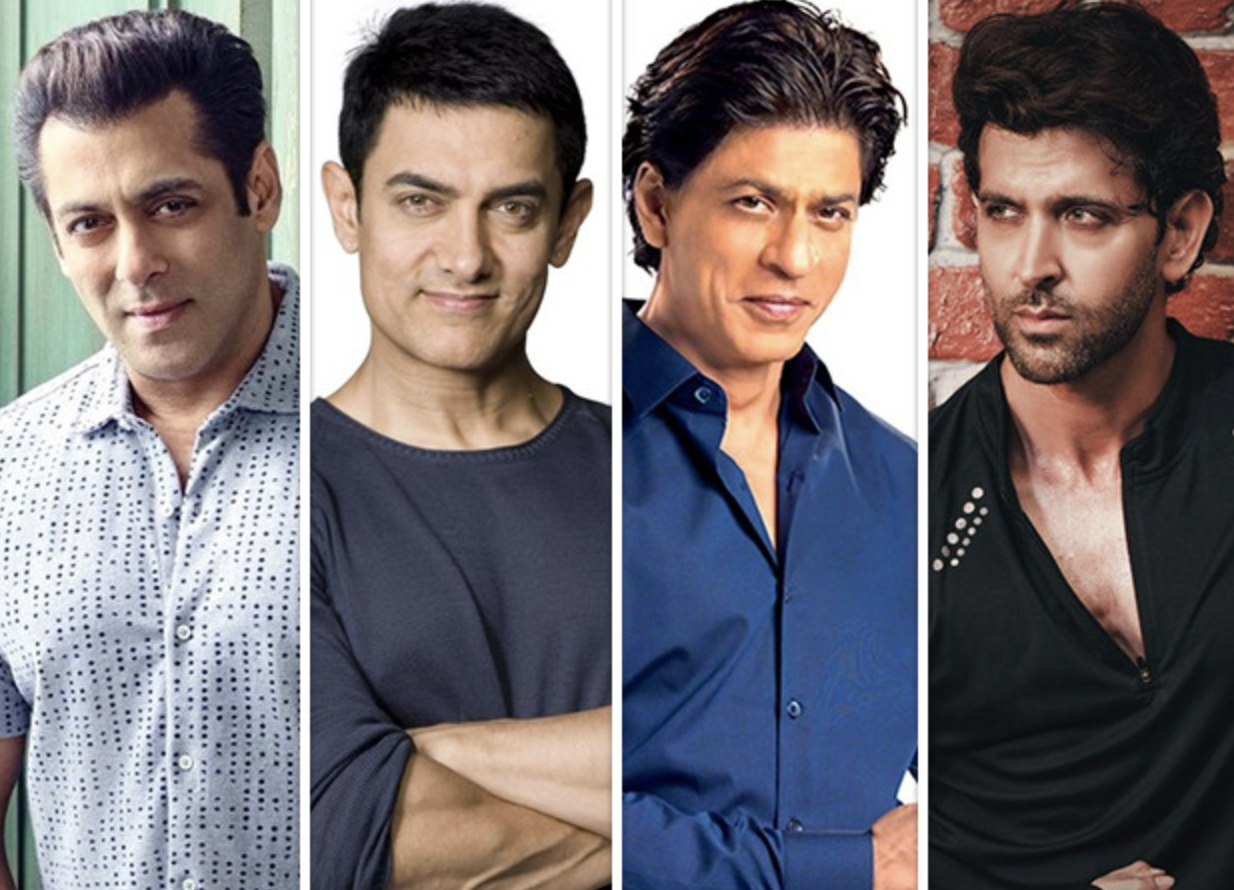

In [2]:
image = Image.open('assets/bollywood.png').convert('RGB')
image

In [3]:
step = 'OBJ0=FACEDET(image=IMAGE)'

In [4]:
facedet = FaceDet(device='cpu')

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
state = {
    'IMAGE': image
}

In [6]:
output, html = facedet.execute(step, state)

In [7]:
output

((358.4359, 89.38893, 562.55426, 369.7806),
 (44.889324, 97.53081, 249.73323, 378.2875),
 (972.6348, 109.40038, 1157.7974, 383.00168),
 (673.24634, 118.27922, 862.3453, 363.54733))

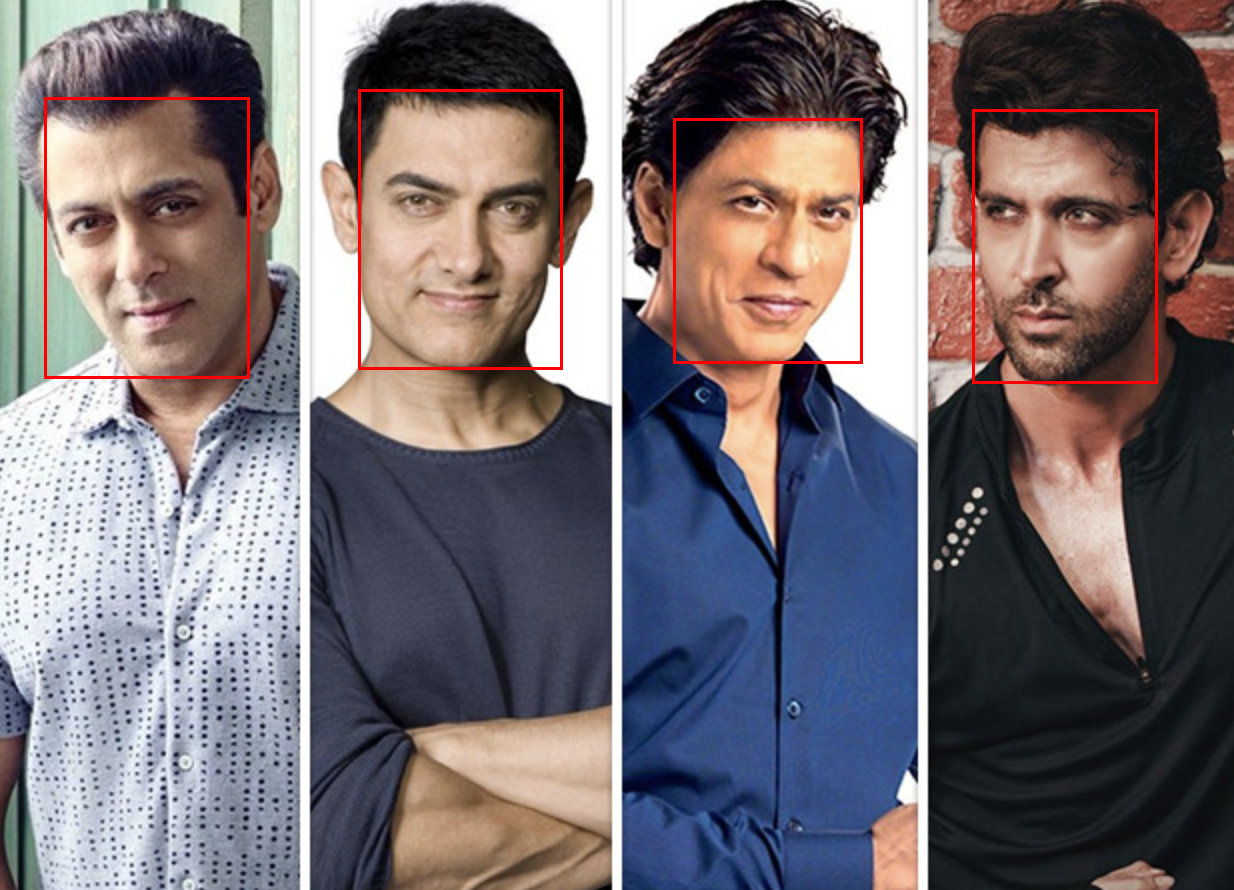

In [8]:
html['image_with_bbox']

In [9]:
state.keys()

dict_keys(['IMAGE', 'OBJ0'])

In [10]:
step2 = "ANSWER=COUNT(box=OBJ0)"

In [11]:
count = Count()

In [12]:
output, html = count.execute(step2, state)

In [13]:
output

4

In [14]:
step3 = """ANSWER1=EVAL(expr="'yes' if {ANSWER} == 4 else 'no'")"""
step3

'ANSWER1=EVAL(expr="\'yes\' if {ANSWER} == 4 else \'no\'")'

In [15]:
eval_module = Eval()

In [16]:
state.keys()

dict_keys(['IMAGE', 'OBJ0', 'ANSWER'])

In [17]:
eval_module.parse(step3)

ParsedStep(output_var_name='ANSWER1', inputs={'expr': "'yes' if ANSWER == 4 else 'no'"}, input_var_names={'ANSWER': 'ANSWER'})

In [18]:
output, html = eval_module.execute(step3, state)

In [19]:
output

'yes'

In [20]:
step4 = "FINAL_RESULT=RESULT(answer=ANSWER1)"

In [21]:
result = Result()

In [22]:
result.execute(step4, state)

({'answer': 'yes'}, {'answer': 'yes'})

In [23]:
state.keys()

dict_keys(['IMAGE', 'OBJ0', 'ANSWER', 'ANSWER1', 'FINAL_RESULT'])

In [24]:
state['FINAL_RESULT']['answer']

'yes'